In [5]:
# Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [6]:
df = pd.read_csv('../Trial+Dom/Resources/Restaurant_Reviews.tsv', sep='\t')

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
print(df.shape)

(1000, 2)


In [8]:
df_500 = df.head(500)

df_500.shape

(500, 2)

In [9]:
example = df_500['Review'][100]

print(example)

Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!


In [10]:
tokens = nltk.word_tokenize(example)

tokens

['Our',
 'server',
 'was',
 'fantastic',
 'and',
 'when',
 'he',
 'found',
 'out',
 'the',
 'wife',
 'loves',
 'roasted',
 'garlic',
 'and',
 'bone',
 'marrow',
 ',',
 'he',
 'added',
 'extra',
 'to',
 'our',
 'meal',
 'and',
 'another',
 'marrow',
 'to',
 'go',
 '!']

In [11]:
tagged_token = nltk.pos_tag(tokens)

print(tagged_token)

[('Our', 'PRP$'), ('server', 'NN'), ('was', 'VBD'), ('fantastic', 'JJ'), ('and', 'CC'), ('when', 'WRB'), ('he', 'PRP'), ('found', 'VBD'), ('out', 'RP'), ('the', 'DT'), ('wife', 'NN'), ('loves', 'VBZ'), ('roasted', 'VBN'), ('garlic', 'JJ'), ('and', 'CC'), ('bone', 'NN'), ('marrow', 'NN'), (',', ','), ('he', 'PRP'), ('added', 'VBD'), ('extra', 'JJ'), ('to', 'TO'), ('our', 'PRP$'), ('meal', 'NN'), ('and', 'CC'), ('another', 'DT'), ('marrow', 'NN'), ('to', 'TO'), ('go', 'VB'), ('!', '.')]


In [12]:
entities = nltk.chunk.ne_chunk(tagged_token)
entities.pprint()

(S
  Our/PRP$
  server/NN
  was/VBD
  fantastic/JJ
  and/CC
  when/WRB
  he/PRP
  found/VBD
  out/RP
  the/DT
  wife/NN
  loves/VBZ
  roasted/VBN
  garlic/JJ
  and/CC
  bone/NN
  marrow/NN
  ,/,
  he/PRP
  added/VBD
  extra/JJ
  to/TO
  our/PRP$
  meal/NN
  and/CC
  another/DT
  marrow/NN
  to/TO
  go/VB
  !/.)


In [13]:
##Import neccessary dependencies for this analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm


#Create an object of Sentiment Intensity Analyzer for easier coding 
SIA = SentimentIntensityAnalyzer()

SIA

In [14]:
SIA.polarity_scores(example)

{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.8221}

In [15]:
df_500['Id'] = np.arange(len(df_500))
df_500.head()

C:\Users\domin\AppData\Local\Temp\ipykernel_3120\2901526407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_500['Id'] = np.arange(len(df_500))


,Review,Liked,Id
0,Wow... Loved this place.,1,0
1,Crust is not good.,0,1
2,Not tasty and the texture was just nasty.,0,2
3,Stopped by during the late May bank holiday of...,1,3
4,The selection on the menu was great and so wer...,1,4


In [16]:
df_500 = df_500[['Id', 'Review', 'Liked']]

df_500.head()

,Id,Review,Liked
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday of...,1
4,4,The selection on the menu was great and so wer...,1


In [17]:
#Run the SIA Polarity Score on the entire dataset
# Create a loop
res = {}

for i, row in tqdm(df_500.iterrows(), total=len(df_500)):
    text = row['Review']
    myid = row['Id']
    res[myid] = SIA.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 4520.75it/s]


In [18]:
vader_df =pd.DataFrame(res).T

vader_df

,neg,neu,pos,compound
0,0.000,0.435,0.565,0.5994
1,0.445,0.555,0.000,-0.3412
2,0.340,0.660,0.000,-0.5574
3,0.093,0.585,0.322,0.6908
4,0.000,0.728,0.272,0.6249
...,...,...,...,...
495,0.762,0.238,0.000,-0.7506
496,0.000,0.575,0.425,0.7688
497,0.000,0.693,0.307,0.6114
498,0.000,0.786,0.214,0.4588


In [19]:
vaders = vader_df.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df_500, how='left')
vaders

,Id,neg,neu,pos,compound,Review,Liked
0,0,0.000,0.435,0.565,0.5994,Wow... Loved this place.,1
1,1,0.445,0.555,0.000,-0.3412,Crust is not good.,0
2,2,0.340,0.660,0.000,-0.5574,Not tasty and the texture was just nasty.,0
3,3,0.093,0.585,0.322,0.6908,Stopped by during the late May bank holiday of...,1
4,4,0.000,0.728,0.272,0.6249,The selection on the menu was great and so wer...,1
...,...,...,...,...,...,...,...
495,495,0.762,0.238,0.000,-0.7506,And then tragedy struck.,0
496,496,0.000,0.575,0.425,0.7688,The pancake was also really good and pretty la...,1
497,497,0.000,0.693,0.307,0.6114,"This was my first crawfish experience, and it ...",1
498,498,0.000,0.786,0.214,0.4588,Their monster chicken fried steak and eggs is ...,1


In [20]:

## Import necessary dependencies
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
#Pull the pre-trained model provided by HuggingFace

link_model = f"cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(link_model)

model = AutoModelForSequenceClassification.from_pretrained(link_model)

In [22]:
#Run ROBERTA model on example

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

print(scores)
print(scores_dict)

[0.00123623 0.0181128  0.98065096]
{'roberta_neg': 0.0012362286, 'roberta_neu': 0.018112803, 'roberta_pos': 0.98065096}


In [23]:
df_500

,Id,Review,Liked
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday of...,1
4,4,The selection on the menu was great and so wer...,1
...,...,...,...
495,495,And then tragedy struck.,0
496,496,The pancake was also really good and pretty la...,1
497,497,"This was my first crawfish experience, and it ...",1
498,498,Their monster chicken fried steak and eggs is ...,1


In [24]:
#Run the Roberta model for the whole dataset
#Create a function
#Skip any errors using Try and Except

def roberta_polarity_scores(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

In [25]:


#iterrate the function using a loop to each row in dataset, same as with vader segment

res = {}

for i, row in tqdm(df_500.iterrows(), total=len(df_500)):
    try:
        text = row['Review']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = roberta_polarity_scores(text)

        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
        
    except RuntimeError:
        print(f'Broke for id {myid}')

100%|██████████| 500/500 [22:04<00:00,  2.65s/it]


In [26]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

results_df = results_df.merge(df_500, how='left')

results_df


,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review,Liked
0,0,0.000,0.435,0.565,0.5994,0.002303,0.010709,0.986987,Wow... Loved this place.,1
1,1,0.445,0.555,0.000,-0.3412,0.964183,0.032228,0.003589,Crust is not good.,0
2,2,0.340,0.660,0.000,-0.5574,0.977226,0.019545,0.003228,Not tasty and the texture was just nasty.,0
3,3,0.093,0.585,0.322,0.6908,0.002215,0.029861,0.967925,Stopped by during the late May bank holiday of...,1
4,4,0.000,0.728,0.272,0.6249,0.002389,0.016415,0.981195,The selection on the menu was great and so wer...,1
...,...,...,...,...,...,...,...,...,...,...
495,495,0.762,0.238,0.000,-0.7506,0.661004,0.304048,0.034948,And then tragedy struck.,0
496,496,0.000,0.575,0.425,0.7688,0.001169,0.017994,0.980837,The pancake was also really good and pretty la...,1
497,497,0.000,0.693,0.307,0.6114,0.001087,0.009546,0.989367,"This was my first crawfish experience, and it ...",1
498,498,0.000,0.786,0.214,0.4588,0.002425,0.019768,0.977806,Their monster chicken fried steak and eggs is ...,1


In [27]:
results_df.to_csv('results.csv', index=False)


In [28]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer, pipeline
import pandas as pd

# Load the results.csv file into a DataFrame
results_df = pd.read_csv('results.csv')

# Select the 'Review' column as the input text data
texts = results_df['Review']

# Load the BERT model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Define a function to predict sentiment labels for a given text
def predict_sentiment(text):
    result = classifier(text)[0]
    return result['label']

# Apply the predict_sentiment function to each text in the DataFrame
results_df['sentiment'] = texts.apply(predict_sentiment)

# Save the DataFrame with predicted sentiment labels to a new CSV file
results_df.to_csv('results_with_sentiment.csv', index=False)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [31]:
clean_df = pd.read_csv("results_with_sentiment.csv")

clean_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review,Liked,sentiment
0,0,0.000,0.435,0.565,0.5994,0.002303,0.010709,0.986987,Wow... Loved this place.,1,5 stars
1,1,0.445,0.555,0.000,-0.3412,0.964183,0.032228,0.003589,Crust is not good.,0,2 stars
2,2,0.340,0.660,0.000,-0.5574,0.977226,0.019545,0.003228,Not tasty and the texture was just nasty.,0,2 stars
3,3,0.093,0.585,0.322,0.6908,0.002215,0.029861,0.967925,Stopped by during the late May bank holiday of...,1,5 stars
4,4,0.000,0.728,0.272,0.6249,0.002389,0.016415,0.981195,The selection on the menu was great and so wer...,1,5 stars


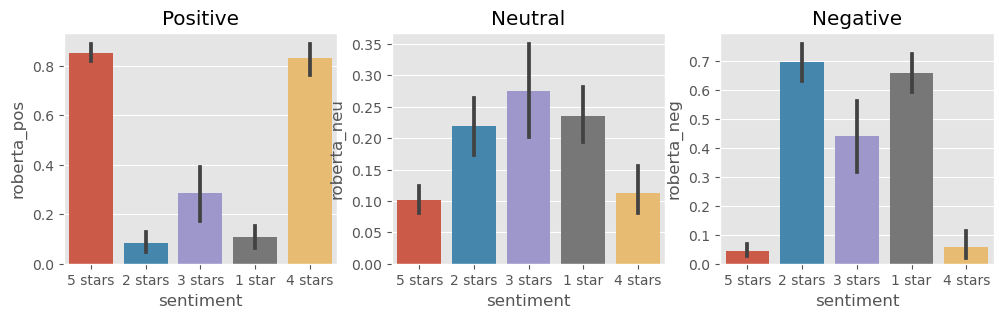

In [33]:
fig, axs = plt.subplots(1,3, figsize=(12,3))

sns.barplot(data=clean_df, x="sentiment", y="roberta_pos", ax=axs[0])
sns.barplot(data=clean_df, x="sentiment", y="roberta_neu", ax=axs[1])
sns.barplot(data=clean_df, x="sentiment", y="roberta_neg", ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

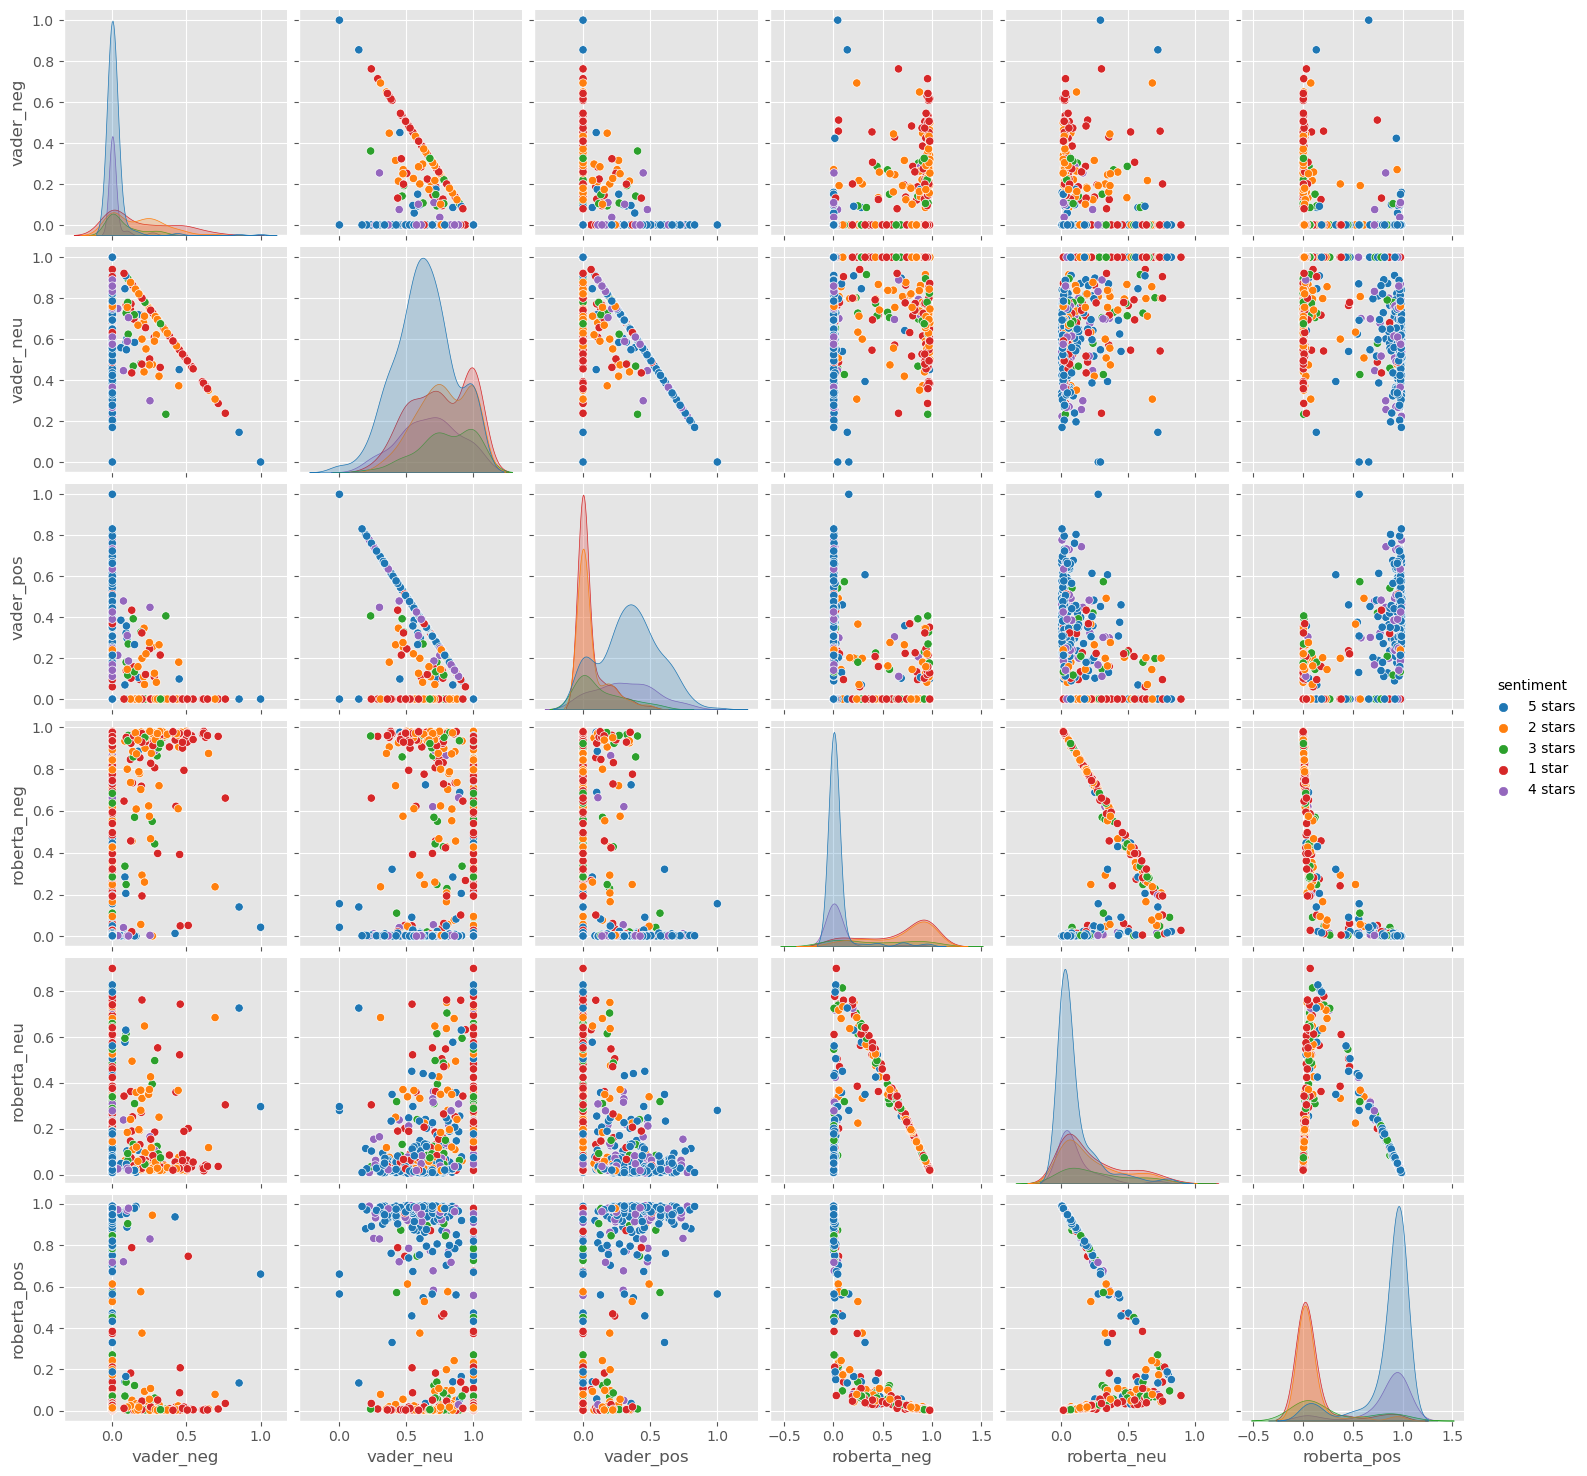

In [34]:
sns.pairplot(data=clean_df, vars=['vader_neg', 'vader_neu', 'vader_pos',
                                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue= 'sentiment',
            palette='tab10')

plt.show()